In [222]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.cm

import statistics as stat
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from itertools import *
try:
    import itertools.izip as zip
except ImportError:
    import itertools

In [7]:
df = pd.read_csv("./ABCD.csv")

In [37]:
df["color_S"]=cols_S
df['C-A'] = df['C']-df['A']
df['B-D'] = df['B']-df['D']


In [311]:
paper_dict = {'Kaznatcheev2019':'green', 'Maltas2023':'orange', 'Faroukkian2020':u'magenta', 'CaiChan2020':'brown',"VulicKolter2001":u"gray", "Li.Traulsen2015":u"cyan"}
col_paper = list()
cols_S = list()

for i in df['paper']:
    if i in paper_dict.keys(): 
        col_paper.append(paper_dict[i])
    else:
        col_paper.append("black")


for i in df['S']:
    if i>0:
        cols_S.append("blue")
    else:
        cols_S.append("green")
    

In [312]:
df["paper"] = pd.Categorical(df["Paper"])
df["paper"]

0     Kaznatcheev2019
1     Kaznatcheev2019
2     Kaznatcheev2019
3     Kaznatcheev2019
4          Maltas2023
5          Maltas2023
6          Maltas2023
7          Maltas2023
8      Faroukkian2020
9      Faroukkian2020
10     Faroukkian2020
11     Faroukkian2020
12     Faroukkian2020
13    VulicKolter2001
14        CaiChan2020
15               Chao
16    Li.Traulsen2015
17                NaN
Name: paper, dtype: category
Categories (7, object): ['CaiChan2020', 'Chao', 'Faroukkian2020', 'Kaznatcheev2019', 'Li.Traulsen2015', 'Maltas2023', 'VulicKolter2001']

In [313]:
df['col_paper'] =col_paper 

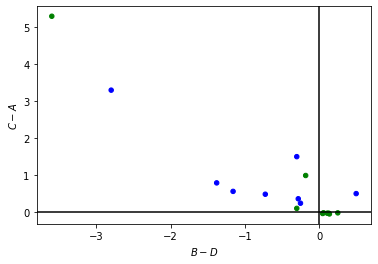

In [199]:

df.plot.scatter(x="B-D", y="C-A", c="color_S")
plt.axhline(0, c='black') ; plt.axvline(0,c='black')
plt.xlabel(r"$B-D$")
plt.ylabel(r"$C-A$")
plt.savefig("Experimental_CA_BD.png")

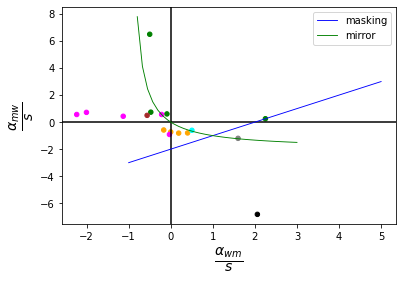

In [331]:
amw = np.linspace(-3, 3, 50) #a_mw
awm_neg = np.linspace(-3, 3, 50) #a_mw
s_pos = np.linspace(0.01,3,50)
s_neg = np.linspace(-3,0.01,50)

# Mirroring
awm_mi = amw 
amw_mi = -2*awm_mi/(awm_mi+1)

#a_wm/s = a_mw/s + 2
awm = amw + 2
#a_wm/s = a_mw/s - 2
amw_neg = awm_neg - 2

# Maintenance
mu = 0.01
s1=s= df['S'][1]
awm_mt_pos = amw*mu/(s*(1+s))

s5=s= df['S'][5] 
awm_mt_neg = amw*(1+s)*mu/(s)



awm_mirror = s_posmir*(2+s_posmir)
amw_mirror = -awm_mirror/(awm_mirror/s_posmir -1) 

awm_mirror_n = s_negmir*(2+s_negmir)
amw_mirror_n = -awm_mirror_n/(awm_mirror_n/s_negmir -1) 

df.plot.scatter(x="awm_s", y="amw_s", c="col_paper")
plt.axhline(0, c='black') ; plt.axvline(0,c='black')
plt.plot(awm, amw, 'b', lw=0.9, label ='masking')
plt.plot(awm_mi[18:50], amw_mi[18:50], 'g', lw=0.9, label ='mirror')
plt.xlabel(r"$\frac{\alpha_{wm}}{s}$", size=20)
plt.ylabel(r"$\frac{\alpha_{mw}}{s}$",size=20)


handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in paper_dict.values()]
#plt.legend(markers, paper_dict.keys(), numpoints=1)

plt.savefig("Experimental_divideS_lines.png", dpi=360)

In [276]:
df

,Lab,Paper,Condition,mu_eff,A,B,C,D,A',B',...,System,constwm,constmw,amw_mim,paper,color,C-A,B-D,color_S,col_paper
0,Scott,Kaznatcheev2019,DMSO+CAF,0.01,2.6000,3.5000,3.10000,3.0000,1.0,1.3462,...,Cancer,0.2571,0.0370,NaN,Kaznatcheev2019,blue,0.50000,0.5000,blue,green
1,Scott,Kaznatcheev2019,DMSO,0.10,2.5000,2.4000,4.00000,2.7000,1.0,0.9600,...,Cancer,-0.0417,0.3421,NaN,Kaznatcheev2019,blue,1.50000,-0.3000,blue,green
2,Scott,Kaznatcheev2019,Alectinib+CAF,0.01,0.5000,-0.4000,3.80000,2.4000,1.0,-0.8000,...,Cancer,2.2500,0.7368,NaN,Kaznatcheev2019,blue,3.30000,-2.8000,blue,green
3,Scott,Kaznatcheev2019,Alectinib,0.01,-1.0000,-1.3000,4.30000,2.3000,1.0,1.3000,...,Cancer,0.2308,2.0000,NaN,Kaznatcheev2019,green,5.30000,-3.6000,green,green
4,Scott,Maltas2023,PC9vEvolved,0.00,1.0000,0.9700,0.97000,0.8400,1.0,0.9700,...,Cancer,-0.0309,0.1150,NaN,Maltas2023,green,-0.03000,0.1300,green,orange
5,Scott,Maltas2023,PC9vKRAS,0.00,1.0300,0.9900,1.01000,0.9300,1.0,0.9612,...,Cancer,-0.0404,0.0721,NaN,Maltas2023,green,-0.02000,0.0600,green,orange
6,Scott,Maltas2023,PC9vPIK3CA,0.00,1.0000,1.0200,0.95000,0.8800,1.0,1.0200,...,Cancer,0.0196,0.0654,NaN,Maltas2023,green,-0.05000,0.1400,green,orange
7,Scott,Maltas2023,PC9vBRAF,0.00,1.0100,1.0100,0.98000,0.9000,1.0,1.0000,...,Cancer,0.0000,0.0734,NaN,Maltas2023,green,-0.03000,0.1100,green,orange
8,Scott,Faroukkian2020,Parental v Res,0.00,0.9963,1.0040,0.97500,0.7517,1.0,1.0077,...,Cancer,0.0077,0.1831,NaN,Faroukkian2020,green,-0.02130,0.2523,green,magenta
9,Scott,Faroukkian2020,PvR 0.25um,0.00,0.4700,0.4200,0.83000,0.7000,1.0,0.8936,...,Cancer,-0.1190,0.2167,NaN,Faroukkian2020,blue,0.36000,-0.2800,blue,magenta


awm_mt_s1

No handles with labels found to put in legend.


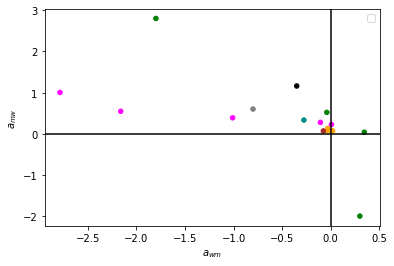

In [305]:
x = np.linspace(-3, 3, 50)
y = x -2*s5
y2 = x + 2*s1


df.plot.scatter(x="a_wm", y="a_mw", c="col_paper")
plt.axhline(0, c='black') ; plt.axvline(0,c='black')
#plt.plot(awm_mt_pos, amw, 'y', lw=2, label ='s>0')
#plt.plot(amw, awm_mt_neg, 'r', lw=2, label ='s<0')
#plt.plot(y2, x, 'b', lw=2, label ='s<0')
#plt.plot(awm_mimic[0:15], amw[0:15],'b',lw=2, label ='s<0')
#plt.plot(awm_mimic[20:50], amw[20:50],'b',lw=2, label ='s<0')

plt.xlabel(r"$a_{wm}$")
plt.ylabel(r"$a_{mw}$")
plt.savefig("Experimental.png")

plt.legend()

No handles with labels found to put in legend.


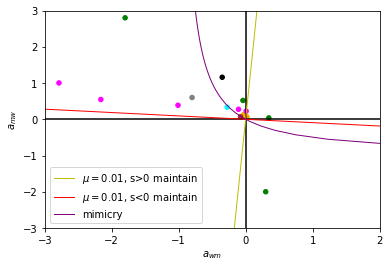

In [334]:
amw = np.linspace(-3, 3, 50) #a_mw
awm_neg = np.linspace(-3, 3, 50) #a_mw
s_pos = np.linspace(0.01,3,50)
s_neg = np.linspace(-3,0.01,50)

awm_mimic = -amw/(1+amw)

x = np.linspace(-3, 3, 50)
y = x -2*s5
y2 = x + 2*s1

df.plot.scatter(x="a_wm", y="a_mw", c="col_paper")
plt.legend()
plt.axhline(0, c='black') ; plt.axvline(0,c='black')
plt.plot(awm_mt_pos[0:50], amw[0:50], 'y', lw=1, label =r'$\mu=0.01$, s>0 maintain')
plt.plot(amw[0:50], awm_mt_neg[0:50], 'r', lw=1, label =r'$\mu=0.01$, s<0 maintain')
#plt.plot(awm_mirror[0:50], amw_mirror[0:50],c='cyan', lw=1, label ='mirroring')
#plt.plot(awm_mirror_n[30:50], amw_mirror_n[30:50],c='cyan', lw=1, label ='mirroring')

#plt.plot(y2, x, 'b', lw=1, label ='masking')
#plt.plot(awm_mimic[0:15], amw[0:15],'b',lw=2, label ='s<0')
plt.plot(awm_mimic[18:50], amw[18:50],c='purple',lw=1, label ='mimicry')
plt.xlim(-3,2)
plt.ylim(-3,3)
plt.xlabel(r"$a_{wm}$")
plt.ylabel(r"$a_{mw}$")
cats = df['paper'].unique()
#cats.add(["masking", "mimicry"])
#cats = cats.add_categories()
plt.legend(paper_dict)
#plt.legend(['','', r'$\mu=0$, s>0 maintain', r'$\mu=0$, s<0 maintain', 'mirroring','masking','mimicry'])

import matplotlib.pyplot as plt

#D_id_color = {'A': u'orchid', 'B': u'darkcyan', 'C': u'grey', 'D': u'dodgerblue', 'E': u'turquoise', 'F': u'darkviolet'}
#x_coordinates = [1,2,3,4,5,6] # Added missing datapoint
#y_coordinates = [3,3,3,3,3,3] # Added missing datapoint
#size_map = [50,100,200,400,800,1200] # Added missing datapoint
#color_map = [color for color in D_id_color.values()[:len(x_coordinates)]]
#plt.scatter(x_coordinates,y_coordinates, s = size_map, c = color_map)

# The following two lines generate custom fake lines that will be used as legend entries:
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in paper_dict.values()]
plt.legend(markers, paper_dict.keys(), numpoints=1)


handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.savefig("Experimental_awm_amw.png", dpi=360)


AttributeError: module 'matplotlib' has no attribute 'colormaps'

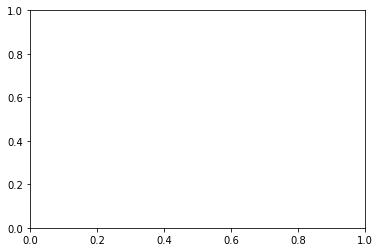

In [16]:
x = np.linspace(-4, 7, 50)


df.plot.scatter(x="awm_s", y="amw_s", c="paper", cmap="plasma"); plt.axhline(0, c='black') ; plt.axvline(0,c='black')
plt.plot(x, y, 'b', lw=0.2, label ='Masking')
#plt.plot(y2,x, 'r', lw=0.2, label ='Mimicry')
plt.xlabel(r"$\frac{a_{wm}}{s}$")
plt.ylabel(r"$\frac{a_{mw}}{s}$")
plt.savefig("Experimental.png")